In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sys

sys.path.append("../../scripts")
from LSTM import PortfolioPredicitionsLSTM_volatility
from LSTM_utils import compute_errors_volatility

# Import des données

In [2]:
titres = {"Amazon": pd.read_csv("../../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../../data/BRK-B.csv"),
          "Google": pd.read_csv("../../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../../data/MSFT.csv"),
          "Exxon": pd.read_csv("../../data/XOM.csv")}

In [3]:
for key, value in titres.items() :
    value["Date"] = pd.to_datetime(value["Date"])
    titres[key] = value.loc[value['Date'].dt.year.isin([2022, 2023])]

# Modélisation

In [4]:
LSTM = PortfolioPredicitionsLSTM_volatility(titres, 
                                            n_steps = 30, 
                                            epochs = 50, 
                                            horizon_prev = 7, 
                                            test_size = 0.5)

In [5]:
predictions, ptf_avg = LSTM.predict_avg_portfolio()

 80%|████████  | 4/5 [00:43<00:11, 11.02s/it]/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/time_split/../scripts/LSTM.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["ret"] = stock['Close'].pct_change()
/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/time_split/../scripts/LSTM.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.dropna(inplace = True)
/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/time_split/../scripts/LSTM.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy 

# Split

In [17]:
stock = titres["Amazon"]
stock["ret"] = stock['Close'].pct_change()
stock.dropna(inplace = True)

stock["volatility"] = stock['ret'].rolling(window=10).std()
stock.dropna(inplace=True)

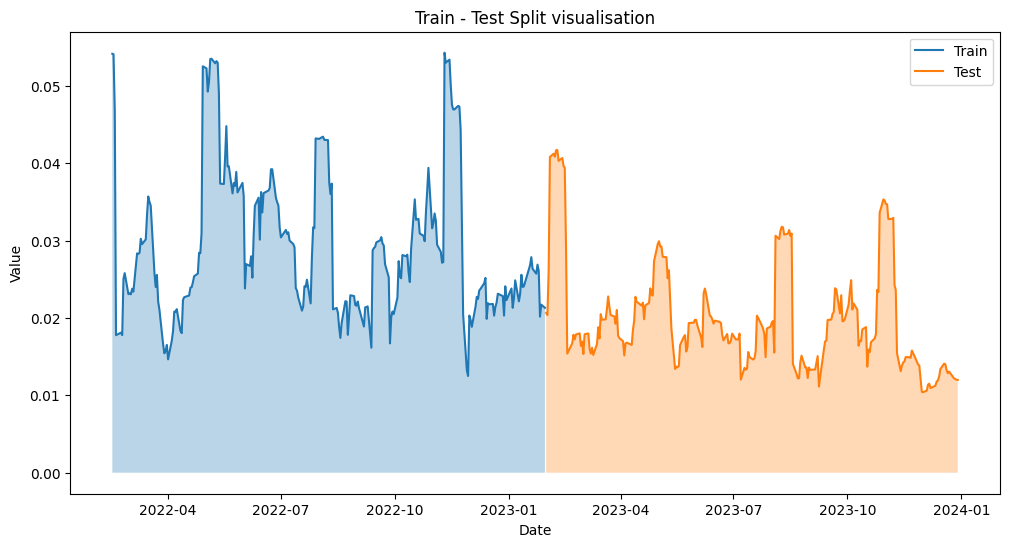

In [18]:
fig = plt.figure(figsize=(12, 6))

plt.plot(stock.Date.iloc[:LSTM.split], stock['volatility'].iloc[:LSTM.split], label='Train')
plt.fill_between(stock.Date.iloc[:LSTM.split], stock['volatility'].iloc[:LSTM.split], alpha = 0.3)

plt.plot(stock.Date.iloc[LSTM.split:], stock['volatility'].iloc[LSTM.split:], label='Test')
plt.fill_between(stock.Date.iloc[LSTM.split:], stock['volatility'].iloc[LSTM.split:], alpha = 0.3)

plt.title(f"Train - Test Split visualisation")
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()
plt.show()

# Résultats

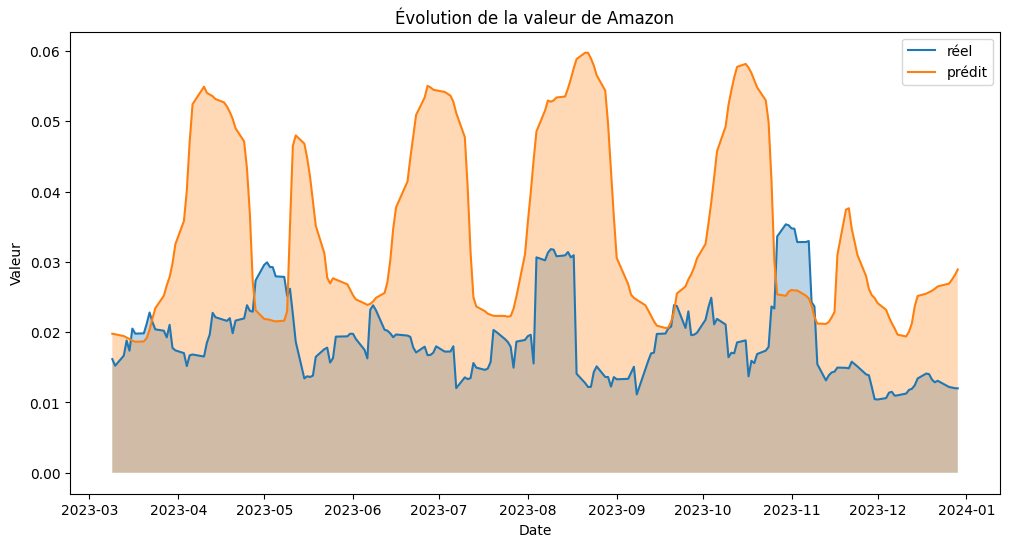

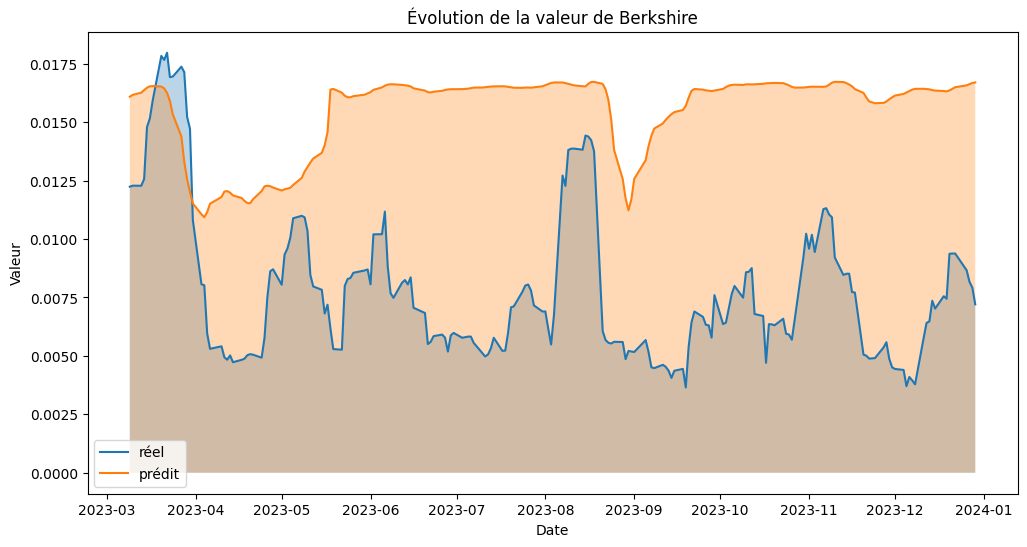

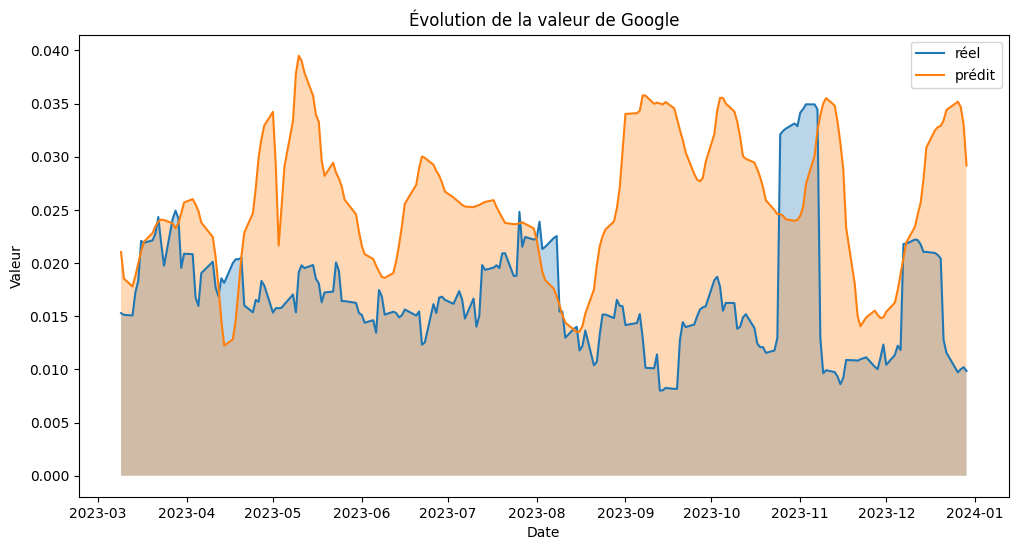

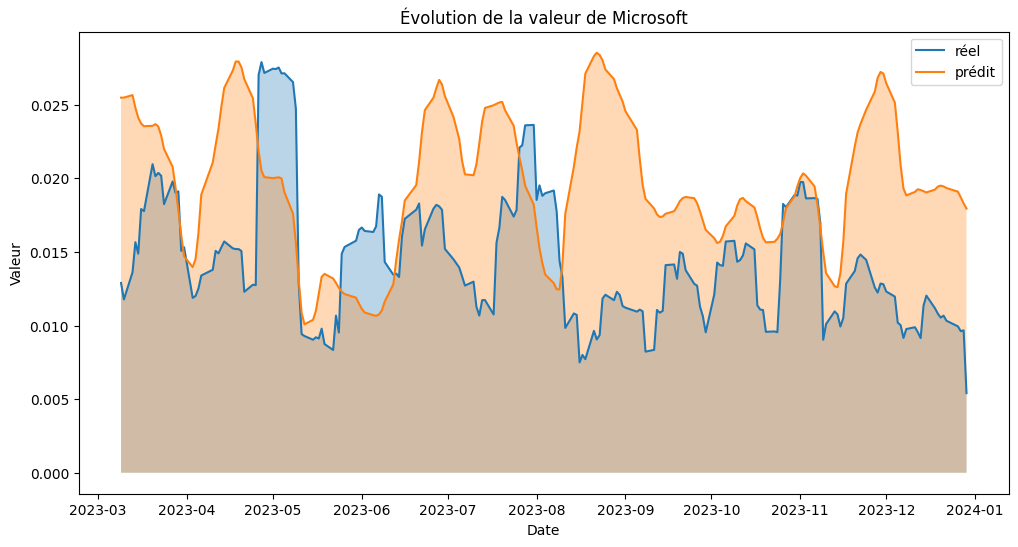

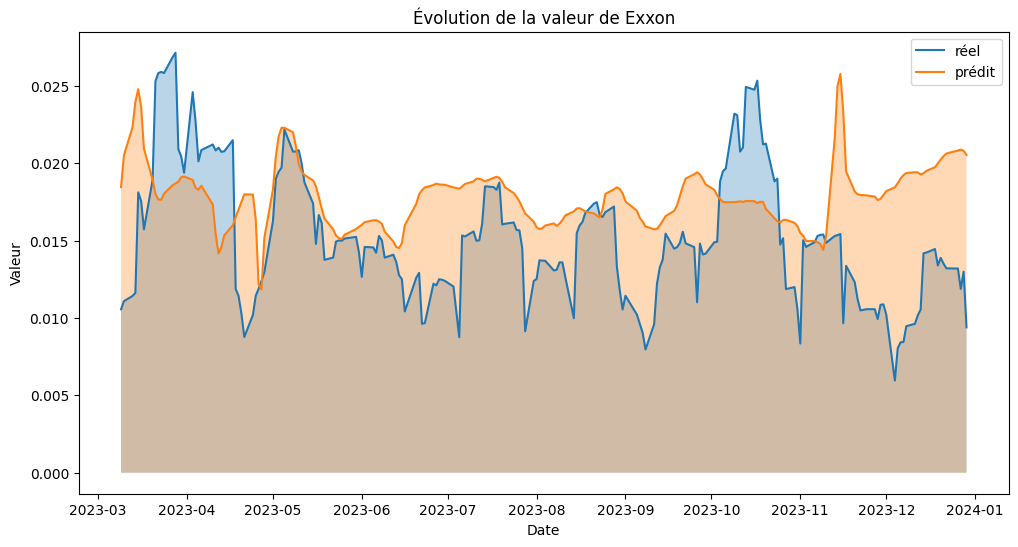

In [15]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12, 6))
    
    plt.plot(value.Date, value['Volatility'], label='réel')
    plt.fill_between(value.Date, value['Volatility'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

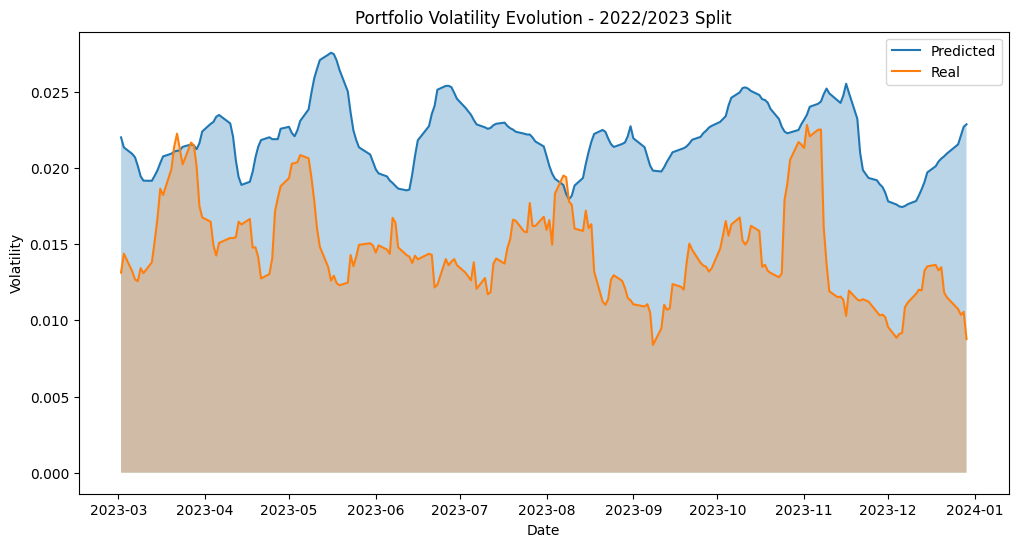

In [6]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Prediction'], label='Predicted')
plt.fill_between(ptf_avg.Date, ptf_avg['Prediction'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Volatility'], label='Real')
plt.fill_between(ptf_avg.Date, ptf_avg['Volatility'], alpha=0.3)

plt.title(f"Portfolio Volatility Evolution - 2022/2023 Split")
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

# Erreurs

In [10]:
errors = compute_errors_volatility(predictions, ptf_avg)

In [11]:
errors

,MSE,RMSE,MAE
Portfolio,0.000071,0.008441,0.007413
Amazon,0.000431,0.020750,0.016034
Berkshire,0.000059,0.007676,0.007096
Google,0.000131,0.011450,0.009403
Microsoft,0.000070,0.008373,0.006668
Exxon,0.000038,0.006201,0.004596
